# Hometask №1. Data processing & descriptors search

In [2]:
import pandas as pd
import numpy as np

### Dataset

In [3]:
data = pd.read_csv("C:\\Users\\User\Downloads\\1.csv", sep=',')
data

,DOI,Date,Journal,Title,Name,measurement_error,measurement_wavelength,measurement_method,normalised_name,raw_value,specifier
0,10.1016/j.physb.2010.04.052,4/29/2010,Physica B: Condensed Matter,EXCITONSPECTRAENERGYBANDSTRUCTURECUALS2CRYSTALS,CuGaSe2,0.0,NaN,el_cde_tables,"[['Cu', 1.0], ['Ga', 1.0], ['Se', 2.0]]",1.8235,n
1,10.1016/j.jep.2012.08.025,8/29/2012,Journal of Ethnopharmacology,INVITROINVIVOANTIMICROBIALACTIVITYALGERIANHOGG...,WC,0.0,NaN,el_cde_tables,NaN,2.66,n
2,10.1016/j.physb.2011.08.013,8/18/2011,Physica B: Condensed Matter,OPTICALPROPERTIESGEASTETHINFILMS,Te–Te,0.0,NaN,el_mylogic,NaN,2.99,Refractive index parameters
3,10.1016/j.jnoncrysol.2011.04.001,5/3/2011,Journal of Non-Crystalline Solids,FOURIERTRANSFORMINFRAREDSPECTROSCOPYINVESTIGAT...,SiC,0.0,NaN,el_mylogic,NaN,2.55,RI (± 0.0001)
4,10.1039/C4PY00369A,8/12/2014,Polymer Chemistry,Camptothecin prodrug block copolymer micelles ...,CPT,0.0,NaN,rsc_cde_text,NaN,3,n
...,...,...,...,...,...,...,...,...,...,...,...
4995,10.1016/j.ejpb.2004.05.003,6/26/2004,European Journal of Pharmaceutics and Biopharm...,APPLYINGPATTERNRECOGNITIONMETHODSSTRUCTUREPROP...,Dihydropyridine,0.0,NaN,el_mylogic,NaN,1.679,Index of refraction
4996,10.1039/C4CS00424H,NaN,NaN,NaN,TiO2,0.0,NaN,snowball,"[['O', 2.0], ['Ti', 1.0]]",2.5,refractive index
4997,10.1016/j.numecd.2015.10.010,11/14/2015,"Nutrition, Metabolism and Cardiovascular Diseases",INCREASINGFRUITVEGETABLEINTAKENOEFFECTRETINALV...,cholesterol,0.0,NaN,el_cde_tables,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C...,4.28,n
4998,10.1016/j.solmat.2010.03.020,4/1/2010,Solar Energy Materials and Solar Cells,DISCUSSIONELECTRICALCHARACTERISTICSIIN013GA087...,SiO2,0.0,NaN,el_mylogic,NaN,1.467,Refractive index


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     5000 non-null   object 
 1   Date                    4555 non-null   object 
 2   Journal                 4555 non-null   object 
 3   Title                   4555 non-null   object 
 4   Name                    4992 non-null   object 
 5   measurement_error       5000 non-null   float64
 6   measurement_wavelength  597 non-null    object 
 7   measurement_method      5000 non-null   object 
 8   normalised_name         2994 non-null   object 
 9   raw_value               5000 non-null   object 
 10  specifier               5000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


### Handling duplicates

In [5]:
# number of duplicated rows
data.duplicated().sum()

22

In [6]:
# keep only one of two duplicates
data = data.drop_duplicates(keep='first')
data.shape

(4978, 11)

### Fixing the 'raw_value' column

In [7]:
def remove_range(string):
    """converts ranges into average value"""
    replace_items = ['–', 'to', ', ', '−', '…', '/', '~']
    for i in replace_items:
        if i in string:
            string = string.replace(i, '∼')
    if string[0]=='∼':
        string = string[1:]
    else:
        splitted_string = string.split('∼')
        try:
            string = str((float(splitted_string[0])+float(splitted_string[1]))/2)
        except:
            string = splitted_string[0]
    return string

def remove_bracket(string):
    """removes brackets from values"""
    string = string.replace('[', '(')
    string = string.replace(']', ')')
    import re
    if '(' in string:
        string = re.sub(r'\(.*?\)\ *', '', string)
        string = string.replace(' ', '')
    return string

def remove_error(string):
    """removes measurement error"""
    replace_items = [' ± ', '+']
    for i in replace_items:
        if i in string:
            string = string.replace(i, '±')
    if ' ± ' in string:
        splitted_string = string.split(' ± ')
    else:
        splitted_string = string.split('±')
    string = splitted_string[0]
    error = splitted_string[1]
    return [string, error]

In [8]:
for idx in data.index:
    v = data.loc[idx, 'raw_value']
    if '(' in v or '[':
        v = remove_bracket(v)
    if '±' in v or '+' in v:
        v = remove_error(v)[0]
        try:
            data.at[idx, 'measurement_error'] = remove_error(v)[1]
        except:
            pass
    if '∼' in v or '~' in v or '–' in v or 'to' in v or ', ' in v or '…' in v or '/' in v or '−' in v:
        v = remove_range(v)
    data.at[idx, 'raw_value'] = v

In [9]:
# print unhandled values
for idx in data.index:
    v = data.loc[idx, 'raw_value']
    try:
        float(v)
    except:
        print(f'Unhandled v = {v} in row {idx}')

Unhandled v = <2 in row 470
Unhandled v = 1.30 2.00 1.97 in row 1454
Unhandled v = 1.401b in row 1569
Unhandled v = 1.50000294,15 in row 2725
Unhandled v = 1.878 1.282 1.258 in row 4252
Unhandled v = 2.92 2.79 2.68 in row 4689


In [10]:
# drop invalid values and reset indexes
data = data.drop(labels=[470, 1454, 2725, 4252, 4689], axis=0)

# fix one value manually
data.at[1569, 'raw_value'] = '1.401'

# reset indexes
data.reset_index(inplace=True)

# convert everythinf into float
data['raw_value'] = data['raw_value'].apply(lambda x: float(x))

# check if the column has a float type finally
data['raw_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4973 entries, 0 to 4972
Series name: raw_value
Non-Null Count  Dtype  
--------------  -----  
4973 non-null   float64
dtypes: float64(1)
memory usage: 39.0 KB


### Deleting values in the 'raw_value' column that have high measurement errors

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

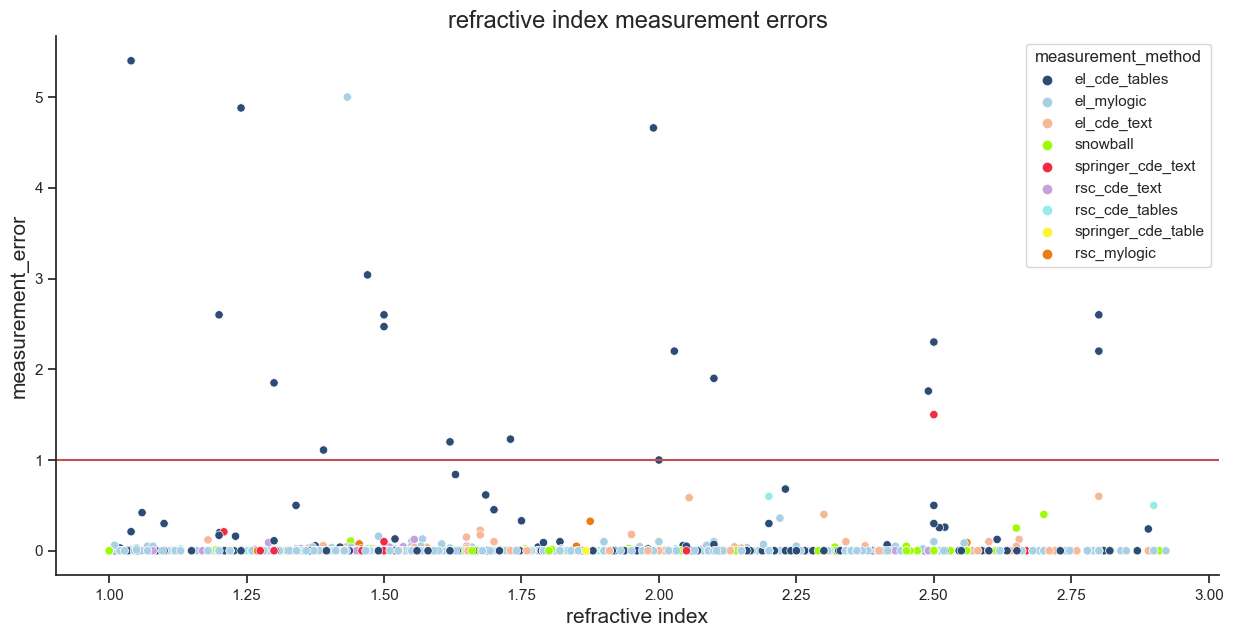

In [58]:
# scatter plot of refractive index measurement errors
custom_params = {"axes.spines.right": False, "axes.spines.top": False}  #hide top and right spines
sns.set_theme(style="ticks", rc=custom_params)                          #set style
f, ax = plt.subplots(figsize=(15, 7))                                   #get figure size
ax.set_title("refractive index measurement errors", fontsize=17)         #set plot title
plt.xlabel('refractive index', fontsize= 15)                            #set x-axes title
plt.ylabel('measurement_error', fontsize= 15)                           #set y-axes title
palette="RdBu"
marker = 'o'
x=data.loc[:,'raw_value'].values
y=data.loc[:,'measurement_error'].values
plt.axhline(y=1, color='r', linestyle='-')
sns.scatterplot(x=x, y=y, data=data, marker=marker, hue='measurement_method', palette=['#2C4B75', '#A7D0E4', '#F7B799', '#9dfc03', '#f02b45', '#c8a0de', '#95edea', '#faf734', '#eb7b13'])

# deleting values that have a measurement error greater than 1
data = data[data.measurement_error < 1]

### Handling outliers in the 'raw_value' column

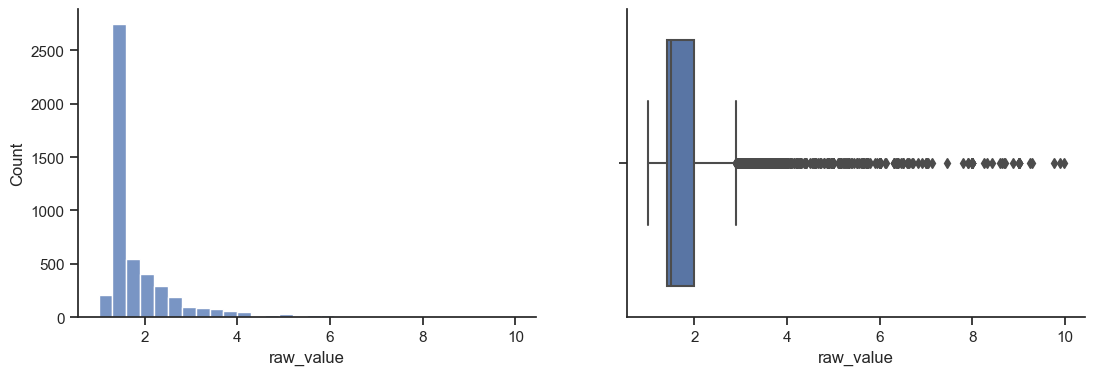

In [15]:
# outliers can be detected with the help of visualization tools
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(data['raw_value'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=data['raw_value'], ax=axs[1])
plt.show()

On the histogram and boxplot wee see that our data is skewed to minimum values and most of the data is located in the range from 1 to 3. We remove otliers, because refractive index greater than 3 is naturally impossible (probably these values were gained in the result of a measurement error).

In [16]:
# remove outliers using boxplot
Q1 = data['raw_value'].quantile(0.25)
Q3 = data['raw_value'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['raw_value'] >= Q1 - 1.5 * IQR) & (data['raw_value'] <= Q3 + 1.5 *IQR)
data = data.loc[filter]
data.shape

(4422, 12)

### Fixing the DOI column

To clean the DOI column we applied regular expressions (regex). Extracted DOI is places into 'DOI' column and journal name is places into 'Journal' column.

In [ ]:
import re

In [17]:
regex = (r'((10\.\d{4,9}/[A-Z0-9]+[A-Z])|(10\.\d{4,9}/[-._;()/:a-zA-Z0-9]+(-[A-Za-z]{1}))|(10\.\d{4,9}/[-._;()/:a-zA-Z0-9]+[0-9]))')
for idx in data.index:
    doi = data.loc[idx, 'DOI']
    extracted_doi = re.search(regex, doi).group(1)
    journal = doi.replace(extracted_doi, '')
    data.at[idx, 'DOI'] = extracted_doi
    if type(data.at[idx, 'Journal'])!=str and journal!='':
        data.at[idx, 'Journal'] = journal

### Handling missing values in 'Name' and 'normalised_name'

In [47]:
from rdkit import Chem
import cirpy
import pubchempy as pcp

In [18]:
# % of missing values for every column
data.isnull().sum() / data.shape[0] * 100

index                      0.000000
DOI                        0.000000
Date                       9.452736
Journal                    4.206242
Title                      9.452736
Name                       0.180914
measurement_error          0.000000
measurement_wavelength    87.426504
measurement_method         0.000000
normalised_name           40.230665
raw_value                  0.000000
specifier                  0.000000
dtype: float64

In [19]:
data_no_name = data[data['Name'].isna()==True]
data_no_name['normalised_name']

9                CCCO
3222        CCOC(C)=O
3250        Cc1ccccc1
3452      CCCCC(CC)CO
3742    Nc1cccc(Cl)c1
4007         O=[Si]=O
4210          CC(C)=O
4213        Nc1ccccc1
Name: normalised_name, dtype: object

We see that all missing names have SMILES in "normalised_name" column. So, we can obtain names by SMILES with the help of CIRpy library.

In [20]:
# fill in gaps in "Name" column
for idx in data.index:
    if type(data.loc[idx, 'Name'])!=str:
        norm_name = data.loc[idx, 'normalised_name']
        new_name = cirpy.resolve(norm_name, 'iupac_name')
        data.at[idx, 'Name'] = new_name
        print(norm_name, new_name)

CCCO Propan-1-ol
CCOC(C)=O Ethyl acetate
Cc1ccccc1 methylbenzene
CCCCC(CC)CO 2-Ethylhexan-1-ol
Nc1cccc(Cl)c1 3-Chloroaniline
O=[Si]=O Dioxosilane
CC(C)=O propan-2-one
Nc1ccccc1 Aniline


Now we can fill in missing values in "normalised_name" column with the help of PubChem API and CIRpy package. Even if "normalised_name" already exists we parse the line through the function, as we want all "normalised_name" values to be in SMILES format. SMILES format is necessary because most of the descriptors are calculated based on SMILES.

In [77]:
for idx in data.index:
    name = data.loc[idx, 'Name']
    try:
        smiles = pcp.get_compounds(name, 'formula')[0].isomeric_smiles
        data.at[idx, 'normalised_name'] = smiles
    except:
        try:
            smiles = pcp.get_compounds(name, 'name')[0].isomeric_smiles
            data.at[idx, 'normalised_name'] = smiles
        except:
            data.at[idx, 'normalised_name'] = np.nan

In [ ]:
for idx in data.index:
    smiles = data.loc[idx, 'normalised_name']
    name = data.loc[idx, 'Name']
    if type(smiles)!=str:
        try:
            new_smiles = cirpy.resolve(name, 'smiles')
        except:
            new_smiles = None
        data.at[idx, 'normalised_name'] = new_smiles

In [21]:
# result dataset (programming was made by supercomputer)
data = pd.read_csv("C:\\Users\\User\Downloads\\data_final.tsv", delimiter='\t')
data['normalised_name'].isnull().sum() / data['normalised_name'].shape[0] * 100

11.924545250392994

There are still missing SMILES. Among them we created a dictionary of names that can be eather corrected or converted to SMILES separately. Other names are deleted because they can not be converted into SMILES unambigously (ex. SnOx).

In [22]:
d_correct = {
            'As40Se60':'As2Se3', 'NMFA':'N-methyl-2-fluoroaniline', 'BiZnBo–':'BiZnBO', 'Si–O':'Si–O',
             'Li2O–GeO2':'Li2O–GeO2', 'GeO2–PbO':'GeO2–PbO', "TiO2's":'TiO2', 'ZnO–Ta2O5–B2O3':'ZnO–Ta2O5–B2O3',
             'CaO–SiO2':'CaO–SiO2', 'GeO2–Bi2O3':'GeO2–Bi2O3', 'Na2O–B2O3':'Na2O–B2O3', 'K2O–TeO2':'K2O–TeO2',
             'CH3–CH2–O–CH2–CH3':'diethyl ether', 'MgO–PbF2–SiO2':'MgO–PbF2–SiO2', 'O–O':'O2', 'F–B':'F–B',
             'PbO–Al2O3':'PbO–Al2O3', 'ZnO–Al2O3':'ZnO–Al2O3', '(−)–Sparteine':'Sparteine', 'PbF2–TeO2–B2O3–Eu2O3':'PbF2–TeO2–B2O3–Eu2O3',
             'CaC2':'Calcium Carbide', 'SiO2 – SnO2':'SiO2–SnO2', 'Ag–ZnO':'Ag–ZnO', 'ZnO –':'ZnO', 'La2O3–B2O3':'La2O3–B2O3',
             'PbO–Sb2O3–B2O3':'PbO–Sb2O3–B2O3', 'BPA–':'BPA', 'Na2O–SiO2':'Na2O–SiO2', 'SiO2(OH)':'HO3Si', 'TeO2–':'TeO2',
             'CH3(CH2)3OH':'butanol', 'TiO2(l)':'TiO2', 'Al(PO3)3':'AlP3O9', 'AgI–B2O3:V2O5':'AgI–B2O3–V2O5',
             'CaF2–Y2O3–ZnO':'CaF2–Y2O3–ZnO', 'Sb2O3–Na2O':'Sb2O3–Na2O', 'Te–Te':'Te–Te', 'TeO2–BaF2':'TeO2–BaF2',
             'SiO2–':'SiO2', 'K2O–B2O3':'K2O–B2O3', 'Ge–Ga–S':'Ge–Ga–S', 'NO3−':'nitrate', 'CuSO4·H2O':'copper sulfate monohydrate',
             'Li2O–Y2O3':'Li2O–Y2O3', 'PbF2–TeO2–B2O3–Sm2O3':'PbF2–TeO2–B2O3–Sm2O3', 'CuSO4·5H2O':'copper sulfate pentahydrate',
             'Na2CO3_aq_23':'Na2CO3', 'GeO2–SiO2':'GeO2–SiO2', 'GeS2–As2S3':'GeS2–As2S3', 'TeO2–B2O3–ZnO':'TeO2–B2O3–ZnO',
             'PbO–Bi2O3':'PbO–Bi2O3', 'ZnSb(wt':'ZnSb', 'K2O–B2O3–Bi2O3':'K2O–B2O3–Bi2O3', 'In2O3–Sc2O3':'In2O3–Sc2O3',
             'ZnO–B2O3':'ZnO–B2O3', 'TiO2–TeO2':'TiO2–TeO2', 'V2O5–GeO2':'V2O5–GeO2', 'Bi2O3–SiO2':'Bi2O3–SiO2',
             'SiO2–Nb2O5':'SiO2–Nb2O5', 'B2O3–SiO2':'B2O3–SiO2', 'SiC(100)':'SiC', 'SiO2–ZrO2':'SiO2–ZrO2',
             'MgO(1 0 0 )':'MgO', 'BaF2–PrF3':'BaF2–PrF3', 'PbO−PbF2−B2O3–Nd2O3':'PbO−PbF2−B2O3–Nd2O3', 'GeS2–Ga2S3–CdS':'GeS2–Ga2S3–CdS',
             'ZnF2–WO3–TeO2':'ZnF2–WO3–TeO2', 'Cd–Se':'Cd–Se', 'SiO2·P2O5':'SiO2–P2O5', 'PbO–TeO2':'PbO–TeO2',
             'TiO2–SiO2':'TiO2–SiO2', 'NO2–BF':'NO2–BF', 'Na2O–P2O5':'Na2O–P2O5'
             }

In [23]:
def complex_smiles(name):
    """makes joint SMILES from a system of molecules (like A-B-C)"""
    smiles_list = []
    names = name.split('–')
    for n in names:
        try:
            smiles = pcp.get_compounds(n, 'formula')[0].isomeric_smiles
        except:
            smiles = pcp.get_compounds(n, 'name')[0].isomeric_smiles
        smiles_list.append(smiles)
    return '.'.join(smiles_list)

In [24]:
for k, v in d_correct.items():
    if '–' in v:
        try:
            d_correct[k] = complex_smiles(v)
        except:
             d_correct[k] = None
    else:
        try:
            smiles = pcp.get_compounds(v, 'formula')[0].isomeric_smiles
            d_correct[k] = smiles
        except:
            try:
                smiles = pcp.get_compounds(v, 'name')[0].isomeric_smiles
                d_correct[k] = smiles
            except:
                d_correct[k] = None

In [25]:
# move SMILES from dictionary to our DataFrame
for idx in data.index:
    name = data.loc[idx, 'Name']
    if name in d_correct.keys():
        data.at[idx, 'normalised_name'] = d_correct[name]

In [26]:
# delete rows with missing "normalised_name"
data = data[data['normalised_name'].isna()==False]

In [27]:
# check if all the SMILES are valid (invalid SMILES can not be handled by RDKit)
for idx in data.index:
    smiles = data.loc[idx, 'normalised_name']
    name = data.loc[idx, 'Name']
    mol = Chem.MolFromSmiles(smiles)
    if mol == None:
        print(f'Invalid smiles: {smiles} in row {idx} for name {name}')

Invalid smiles: C.C.O.CN[OH]C in row 536 for name CH3O(CH2CH2O)nCH3
Invalid smiles: [CH222]O in row 614 for name CH222-OH
Invalid smiles: O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC in row 736 for name BTO
Invalid smiles: B(P)[II] in row 1161 for name Pb[II]
Invalid smiles: O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC in row 1820 for name BTO


In [28]:
# correction of invalid SMILES
data.loc[1161, 'normalised_name'] = '[Pb+2]'
data.loc[736, 'normalised_name'] = 'CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC'
data.loc[1820, 'normalised_name'] = 'CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC'
data.drop(labels=[536, 614], axis=0, inplace=True) # delete two rows because SMILES can not be corrected

In [44]:
data = pd.read_csv('C:\\Users\\User\Downloads\\data_for_descriptors.tsv', delimiter='\t')

### Descriptors search

We use RDKit API, PubChem API, and a python wrapper for PaDEL-Descriptor software to find descriptors.

In [41]:
from padelpy import from_smiles
from rdkit.Chem import Descriptors
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # supress rdkit warnings
import cirpy
import pubchempy as pcp

In [45]:
def getMolDescriptors(mol, missingVal=None):
    """calculate the full list of RDKit descriptors for a molecule"""
    """missingVal is used when descriptor cannot be calculated"""
    res = {}
    for nm,fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        res[nm] = val
    return res

In [48]:
# create a separate DataFrame with RDKit descriptors
mols = []
for smiles in data['normalised_name'].tolist():
  mol = Chem.MolFromSmiles(smiles)
  mols.append(mol)
allDescrs = [getMolDescriptors(mol) for mol in mols]
rdkit_data = pd.DataFrame(allDescrs)
rdkit_data.head() # so we get 208 RDKit descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.000000,0.000000,0.000000,0.000000,0.494829,291.189,291.189,291.689311,28,4,...,0,0,0,0,0,0,0,0,0,0
1,5.833333,0.833333,5.833333,0.833333,0.480843,195.851,195.851,195.950931,10,1,...,0,0,0,0,0,0,0,0,0,0
2,5.555556,2.222222,5.555556,2.222222,0.256934,40.097,40.097,39.976927,8,0,...,0,0,0,0,0,0,0,0,0,0
3,8.402778,-1.416667,8.402778,1.416667,0.349091,60.084,60.084,59.966756,16,0,...,0,0,0,0,0,0,0,0,0,0
4,10.031944,-0.212963,10.031944,0.025463,0.460748,102.133,92.053,102.068080,42,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# create a separate DatFrame with PubChem descriptors
properties = ['MonoisotopicMass',
              'Complexity',
              'IsotopeAtomCount',
              'AtomStereoCount',
              'DefinedAtomStereoCount',
              'UndefinedAtomStereoCount',
              'BondStereoCount',
              'DefinedBondStereoCount',
              'UndefinedBondStereoCount',
              'CovalentUnitCount',
              'Volume3D',
              'XStericQuadrupole3D',
              'YStericQuadrupole3D',
              'ZStericQuadrupole3D',
              'FeatureCount3D',
              'FeatureRingCount3D',
              'FeatureHydrophobeCount3D',
              'ConformerModelRMSD3D',
              'EffectiveRotorCount3D',
              'ConformerCount3D']
pubchem_descriptors = []
for smiles in data['normalised_name'].tolist():
  descriptors_list = []
  for property in properties:
      try:
        p = pcp.get_properties(property, smiles, 'smiles')
        descriptors_list.append(p[0][property])
      except:
        descriptors_list.append(None)
  pubchem_descriptors.append(descriptors_list)
pubchem_data = pd.DataFrame(columns=properties, data=pubchem_descriptors)

In [34]:
# programming was made by supercomputer
pubchem_data = pd.read_csv('C:\\Users\\User\Downloads\\pubchem_data.tsv', delimiter='\t')
pubchem_data.head() # so we get 20 pubchem descriptors

,MonoisotopicMass,Complexity,IsotopeAtomCount,AtomStereoCount,DefinedAtomStereoCount,UndefinedAtomStereoCount,BondStereoCount,DefinedBondStereoCount,UndefinedBondStereoCount,CovalentUnitCount,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,291.688210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,195.950933,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,39.976927,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.9,1.35,0.83,0.83,0.0,0.0,0.0,0.4,0.0,1.0
3,59.966756,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.8,1.39,0.92,0.75,0.0,0.0,0.0,0.4,0.0,1.0
4,102.068080,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.8,3.12,1.15,0.86,2.0,0.0,1.0,0.4,2.0,6.0


In [ ]:
# calculate descriptors
n = 0
for smiles in data['normalised_name'].tolist():
    try:
        from_smiles(smiles, output_csv=f'padel_data_{n}.csv')
        n += 1
    except:
        n += 1

# create an empty dataset for missing molecules
empty = pd.DataFrame(0, index=range(0, 1), columns=range(0, 1875))

# concatenate all the dataframes with descriptors
frames = []
for i in range(0, 4011):
    df = pd.read_csv(f'padel_data_{i}.csv')
    if df.shape==(0, 1876):
        frames.append(empty)
    else:
        frames.append(df)
final = pd.concat(frames, ignore_index=True)

final.to_csv('padel_data_1.csv', index=False)

In [53]:
# programming was made y supercomputer
padel_data = pd.read_csv('C:\\Users\\User\Downloads\\padel_data_1.csv')
padel_data.head() # so we get 772 padel descriptors

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.0,NaN,NaN,NaN,23.760379,0.0,0.0,7.0,4.0,3.0,...,42.101670,4.000000,1.000000,4.000000,0.000000,0.0,6.000000e+09,0.0,0.000,0.0
1,0.0,0.0000,0.000000,0.0000,12.860000,0.0,0.0,2.0,2.0,0.0,...,97.975466,3.000000,1.500000,2.000000,0.000000,0.0,1.000000e+00,0.0,0.000,2.0
2,0.0,0.0000,0.000000,0.0000,7.140000,0.0,0.0,2.0,2.0,0.0,...,19.988463,3.000000,1.500000,2.000000,0.000000,0.0,1.000000e+00,0.0,0.000,2.0
3,0.0,-0.0466,0.002172,2.8858,6.984000,0.0,0.0,3.0,3.0,0.0,...,19.988919,4.914214,1.638071,6.828427,4.414214,0.0,4.000000e+00,0.0,-0.798,6.0
4,0.0,-0.0290,0.000841,26.9114,17.071930,0.0,0.0,17.0,7.0,10.0,...,6.004005,12.509162,1.787023,5.113028,5.113028,0.0,4.800000e+01,4.0,1.124,26.0


In [55]:
# join initial dataset with descriptors datasets
df = data.join([rdkit_data, pubchem_data, padel_data])
df.reset_index(inplace=True)
df.shape

(4011, 1013)

### Data imputation, normalization and transformation

In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('C:\\Users\\User\Downloads\\dataset_with_descriptors.tsv', delimiter='\t')

In [10]:
# delete columns with >=30% missing values
df.dropna(axis=1, thresh=np.round(df.shape[0]*0.7), inplace=True)
df.shape

(4011, 907)

In [11]:
# create dataset with numeric features
df_numeric = df.drop(['index', 'DOI', 'Date', 'Journal', 'Title', 'Name', 'specifier', 'measurement_method', 'normalised_name'], axis=1)

# create dataset with categorical features
df_categorical = pd.DataFrame(df['measurement_method'])

In [14]:
# encode categorical features and create a dataset
encoded_features = LabelEncoder().fit_transform(df_categorical)
df_encoded = pd.DataFrame(encoded_features, columns=['measurement_method'])

# concatenate encoded dataset with numeric dataset
df_numeric = pd.concat([df_numeric, df_encoded], axis=1)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# replace infinite floats with nan
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# impute other missing values with kNN-imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# normalization
normalized_features = MinMaxScaler().fit_transform(df_imputed)
df_normalized = pd.DataFrame(normalized_features, columns=df_numeric.columns)

In [16]:
# divide normalized dataset into predictors and target
X_normalized = df_normalized.drop(['raw_value'], axis=1)
Y_normalized = pd.DataFrame(df_normalized['raw_value'], columns=['raw_value'])

# Hometask №2. Data visualization & statistics

### Data visualization

Text(0.5, 1.0, 'Measurement methods')

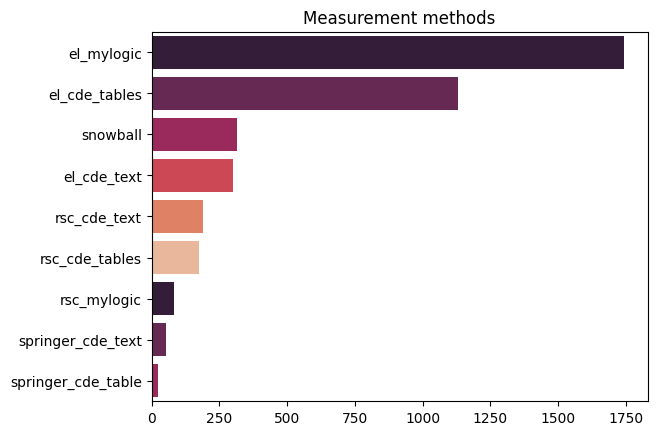

In [78]:
# plot shows which measument methods were used to get refractive indexes for this dataset
df2 = df.groupby(['measurement_method'])['measurement_method'].count().sort_values(ascending=False)
labels = list(df2.keys())
data = list(df2)
sns.barplot(x=data, y=labels, palette=sns.color_palette("rocket")).set_title('Measurement methods')

In [79]:
# plot shows distribution of refractive indexes within a certain measurement method
fig = px.histogram(df, 'raw_value', color='measurement_method')
fig.show()

In [5]:
# preparing data for visualization
el_cde_tables = df.loc[df["measurement_method"] == "el_cde_tables", "raw_value"]
el_mylogic = df.loc[df["measurement_method"] == "el_mylogic", "raw_value"]
el_cde_text = df.loc[df["measurement_method"] == "el_cde_text", "raw_value"]
snowball = df.loc[df["measurement_method"] == "snowball", "raw_value"]
springer_cde_table = df.loc[df["measurement_method"] == "springer_cde_table", "raw_value"]
springer_cde_text = df.loc[df["measurement_method"] == "springer_cde_text", "raw_value"]
rsc_cde_tables = df.loc[df["measurement_method"] == "rsc_cde_tables", "raw_value"]
rsc_cde_text = df.loc[df["measurement_method"] == "rsc_cde_text", "raw_value"]
rsc_mylogic = df.loc[df["measurement_method"] == "rsc_mylogic", "raw_value"]

In [47]:
stats = ["el_cde_tables", "el_mylogic", "el_cde_text", "snowball", "springer_cde_table", "springer_cde_text", "rsc_cde_tables", "rsc_cde_text", "rsc_mylogic"]
dfs = []
for name in stats:
    sf = globals()[name].describe()
    table = pd.DataFrame({name:sf.values})
    dfs.append(table)
t1 = pd.DataFrame({'statistics':sf.index})
dfs.append(t1)
stat_df = pd.concat(dfs, axis=1)
stat_df[['statistics', "el_cde_tables", "el_mylogic", "el_cde_text", "snowball", "springer_cde_table", "springer_cde_text", "rsc_cde_tables", "rsc_cde_text", "rsc_mylogic"]]

,statistics,el_cde_tables,el_mylogic,el_cde_text,snowball,springer_cde_table,springer_cde_text,rsc_cde_tables,rsc_cde_text,rsc_mylogic
0,count,1130.000000,1743.000000,300.000000,314.000000,24.000000,52.000000,174.000000,191.000000,83.000000
1,mean,1.579966,1.591595,1.723484,1.726629,1.850192,1.618367,1.506625,1.690989,1.510006
2,std,0.360461,0.351460,0.410649,0.418435,0.433520,0.400412,0.262101,0.408785,0.246546
3,min,1.000035,1.000500,1.000200,1.000297,1.327000,1.022000,1.010000,1.015500,1.050000
4,25%,1.377400,1.385000,1.450000,1.446500,1.470000,1.415000,1.396338,1.420000,1.380800
5,50%,1.451500,1.461880,1.529000,1.507750,1.850500,1.460000,1.430000,1.500000,1.430500
6,75%,1.630000,1.650000,2.000000,2.004500,2.132500,1.590000,1.496750,2.000000,1.570000
7,max,2.900000,2.922000,2.900000,2.910000,2.800000,2.720000,2.900000,2.800000,2.560000


The mean values for each of the tables are generally close to each other, with a range between 1.50 to 1.72. However, the standard deviation values vary quite a bit between the tables, with a range of 0.26 to 0.41. This indicates that the data points for some tables are more spread out than others. The medians for most of the tables are around 1.45 to 1.50, which is close to the lower end of the range for the mean values. This suggests that there may be some outliers or extreme values that are causing the mean values to be slightly higher than the medians. The "el_cde_text" and "snowball" tables have higher medians than the other tables, indicating that their data points are skewed towards higher values. This is further supported by their higher quartile values. The "springer_cde_table" table has the highest median and mean values, suggesting that its data points are generally higher than the other tables. However, this table also has the smallest sample size, with only 24 data points, so its results may not be as reliable as the others. Overall, we can conclude that the data for the different measurement methods are fairly consistent in terms of mean values, but there is some variability in the spread of the data points and the presence of outliers.

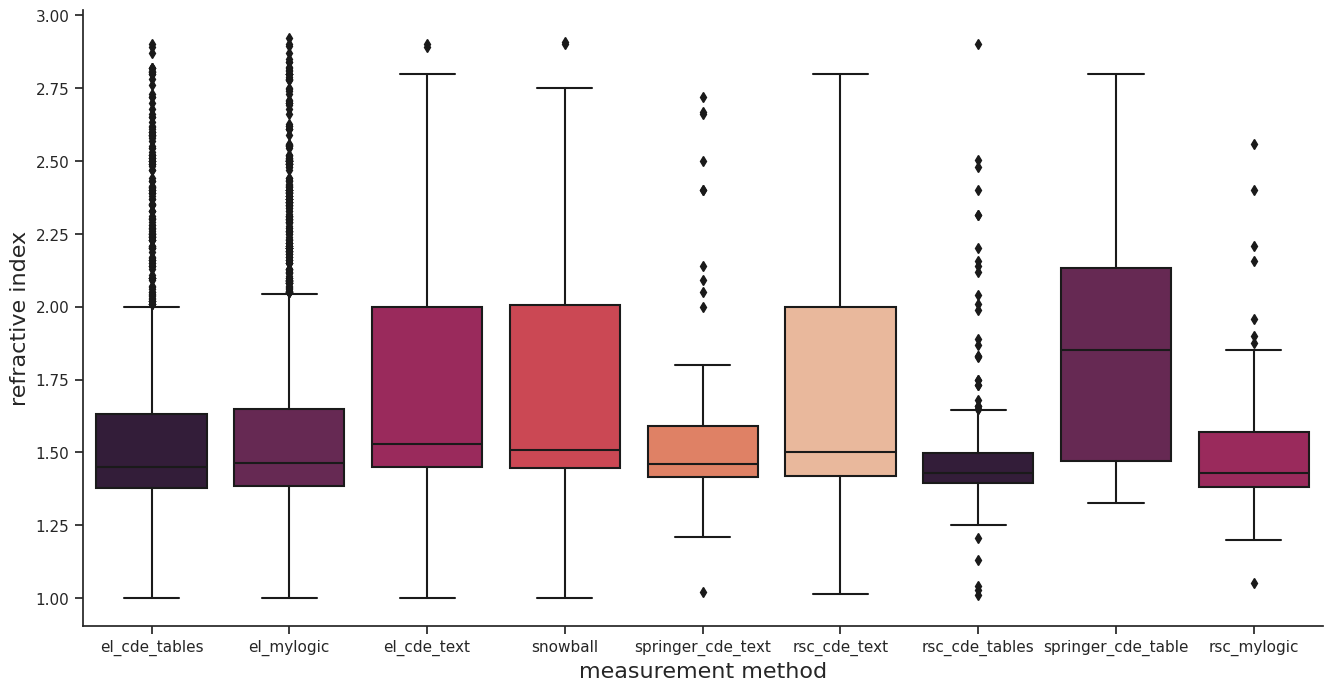

In [17]:
# visualize the data using boxplots
plt.figure(figsize=(16, 8))
x=df.loc[:, "raw_value"].values
sns.boxplot(data=df, x="measurement_method", y=x, palette=sns.color_palette("rocket"))
plt.ylabel("refractive index", fontsize = 16)
plt.xlabel("measurement method", fontsize = 16)
plt.show()

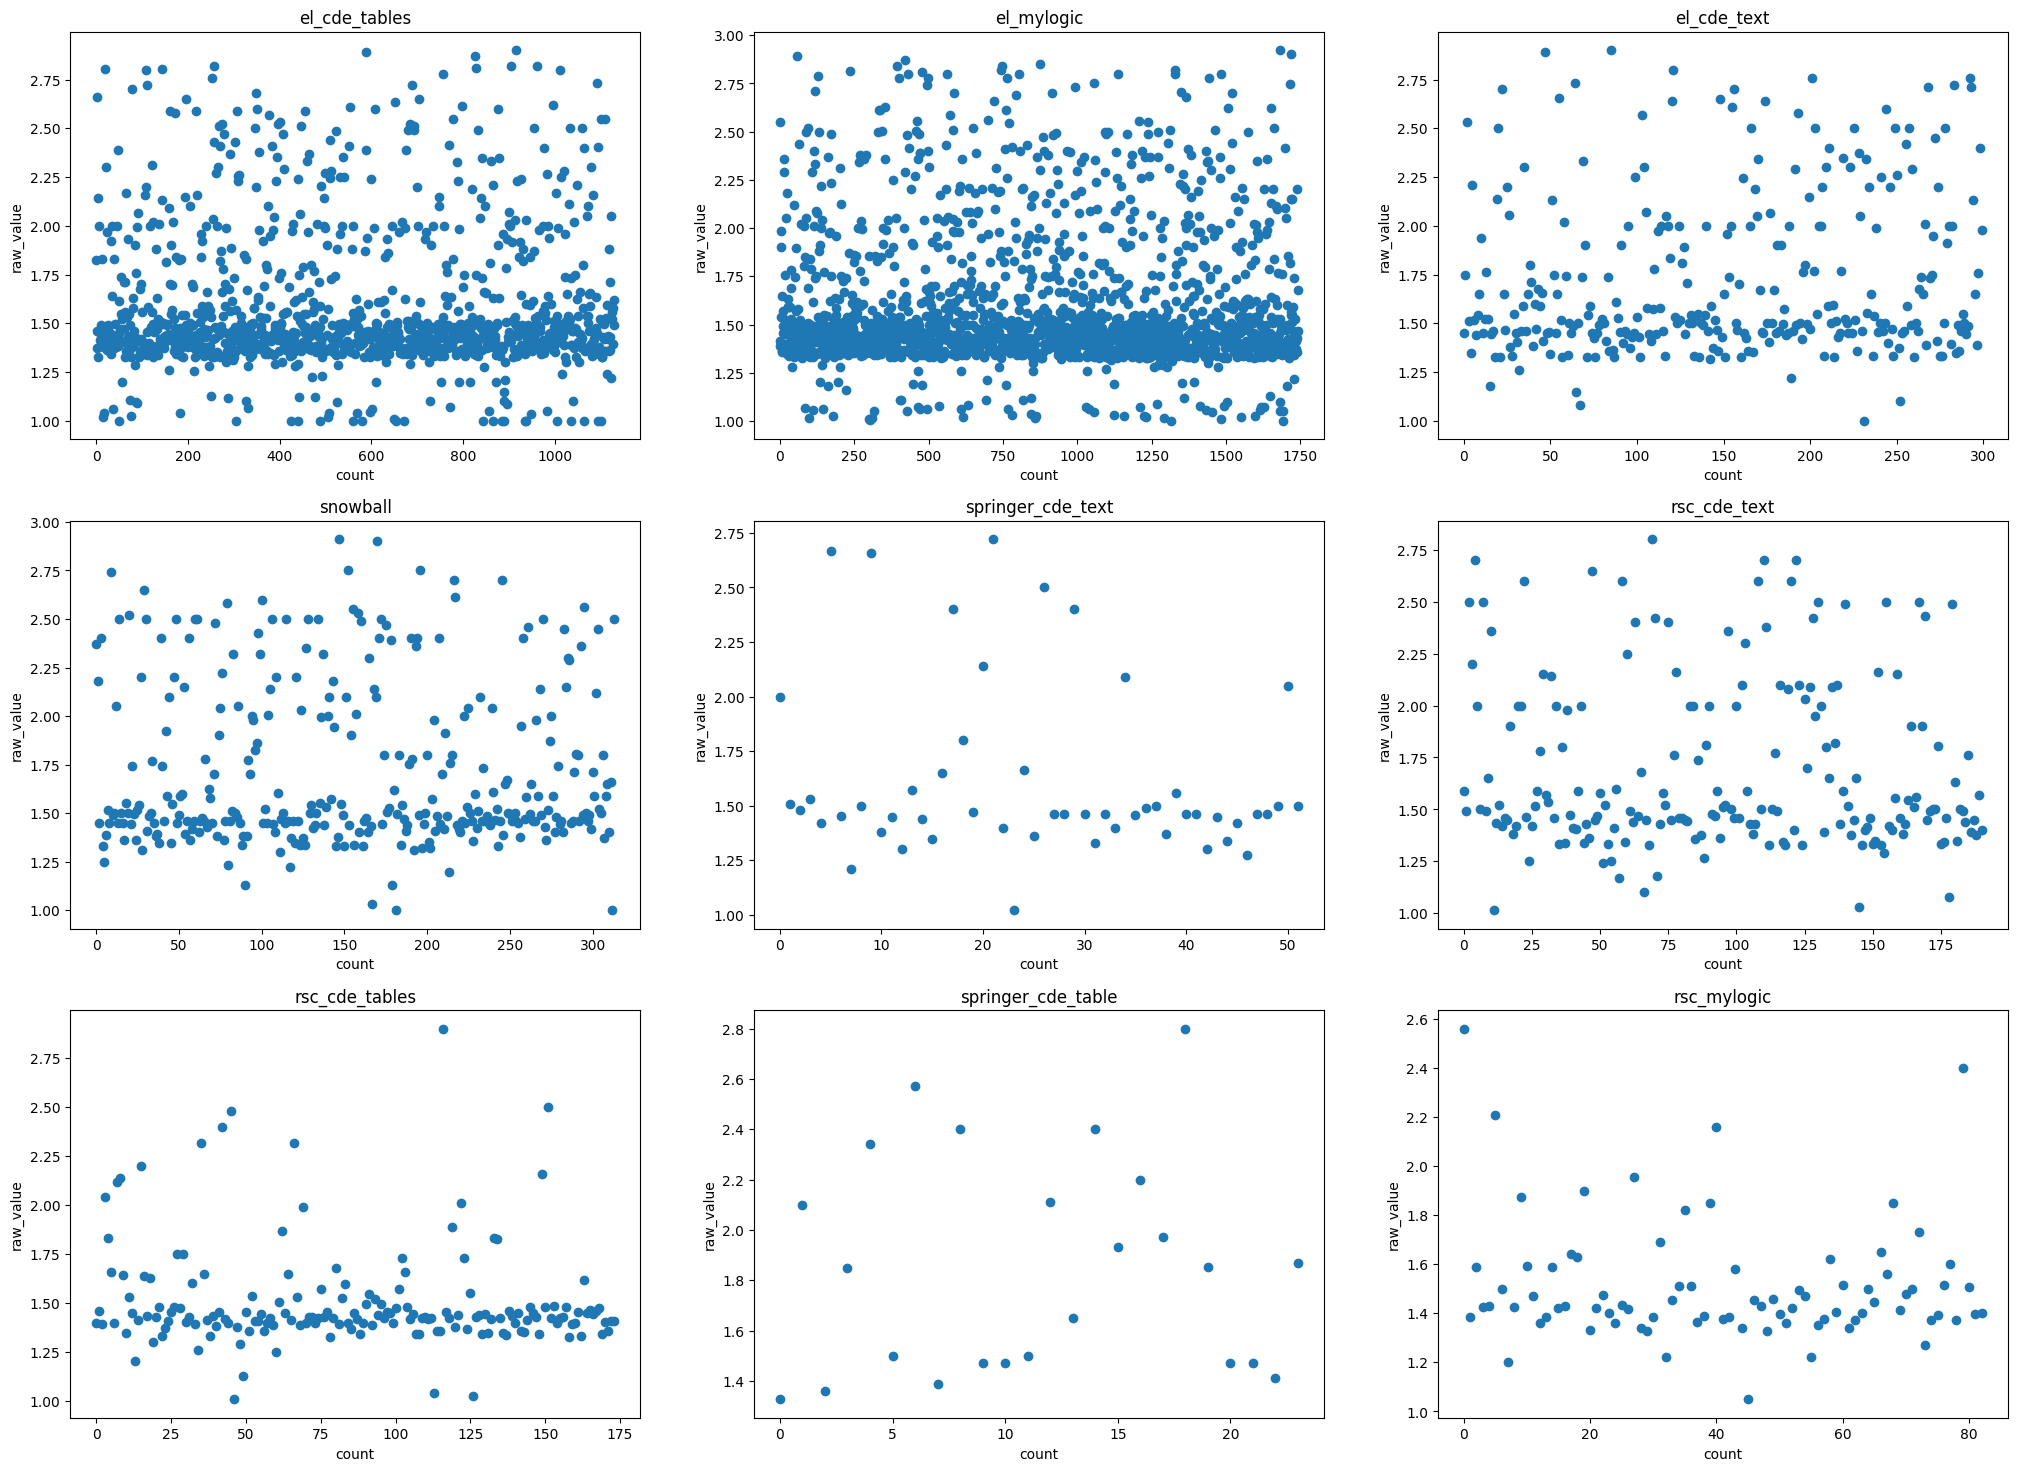

In [14]:
# visualize the data using scatterplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 18))
axes[0, 0].scatter(x=range(len(el_cde_tables)), y=el_cde_tables)
axes[0, 0].set_title("el_cde_tables")
axes[0, 0].set_xlabel("count")
axes[0, 0].set_ylabel("raw_value")
axes[0, 1].scatter(x=range(len(el_mylogic)), y=el_mylogic)
axes[0, 1].set_title("el_mylogic")
axes[0, 1].set_xlabel("count")
axes[0, 1].set_ylabel("raw_value")
axes[0, 2].scatter(x=range(len(el_cde_text)), y=el_cde_text)
axes[0, 2].set_title("el_cde_text")
axes[0, 2].set_xlabel("count")
axes[0, 2].set_ylabel("raw_value")
axes[1, 0].scatter(x=range(len(snowball)), y=snowball)
axes[1, 0].set_title("snowball")
axes[1, 0].set_xlabel("count")
axes[1, 0].set_ylabel("raw_value")
axes[1, 1].scatter(x=range(len(springer_cde_text)), y=springer_cde_text)
axes[1, 1].set_title("springer_cde_text")
axes[1, 1].set_xlabel("count")
axes[1, 1].set_ylabel("raw_value")
axes[1, 2].scatter(x=range(len(rsc_cde_text)), y=rsc_cde_text)
axes[1, 2].set_title("rsc_cde_text")
axes[1, 2].set_xlabel("count")
axes[1, 2].set_ylabel("raw_value")
axes[2, 0].scatter(x=range(len(rsc_cde_tables)), y=rsc_cde_tables)
axes[2, 0].set_title("rsc_cde_tables")
axes[2, 0].set_xlabel("count")
axes[2, 0].set_ylabel("raw_value")
axes[2, 1].scatter(x=range(len(springer_cde_table)), y=springer_cde_table)
axes[2, 1].set_title("springer_cde_table")
axes[2, 1].set_xlabel("count")
axes[2, 1].set_ylabel("raw_value")
axes[2, 2].scatter(x=range(len(rsc_mylogic)), y=rsc_mylogic)
axes[2, 2].set_title("rsc_mylogic")
axes[2, 2].set_xlabel("count")
axes[2, 2].set_ylabel("raw_value")

plt.show()

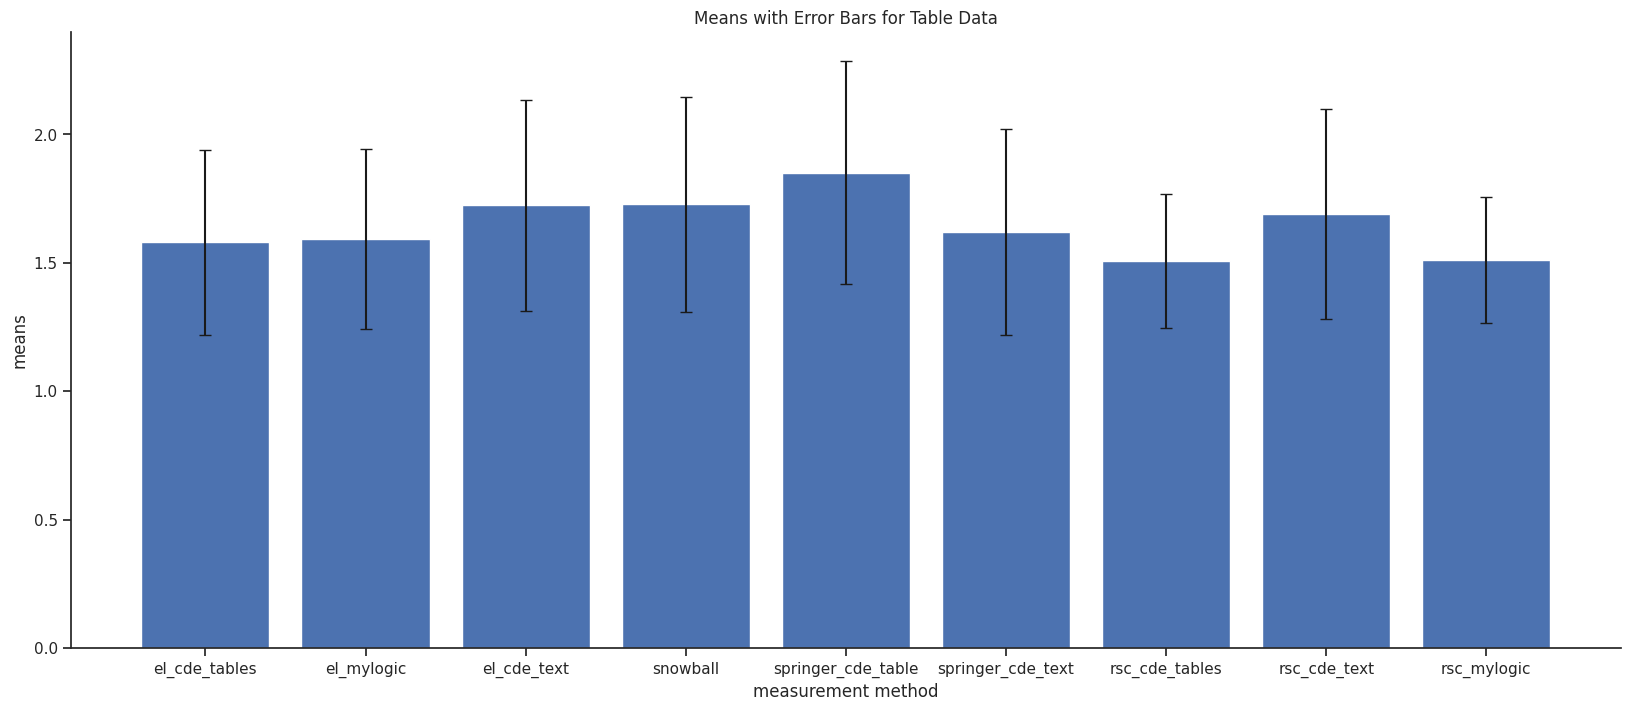

In [16]:
# visualize the data using bar chart
means = []
stds = []

# Loop through each table and calculate mean and standard deviation
for name in table_names:
    table = globals()[name]
    means.append(table.mean())
    stds.append(table.std())

# Create bar chart with error bars
custom_params = {"axes.spines.right": False, "axes.spines.top": False}  #hide top and right spines
sns.set_theme(style="ticks", rc=custom_params)
plt.figure(figsize=(20,8))
plt.bar(table_names, means, yerr=stds, capsize=4)
plt.title('Means with Error Bars for Table Data')
plt.xlabel('measurement method')
plt.ylabel('means')
plt.show()

### Multicolinearity investigation

Firstly, we investigate multicolinearity between PubChem descriptors. MonoisotopicMass slightly correlates with 3D descriptors. The highest positive correlation is between Volume3D and MonoisotopicMass. Also stereo descriptors strongly correlate with each other. The solution could be to leave only one from similar descriptors from Atom- and BondStereoCount.

<AxesSubplot:>

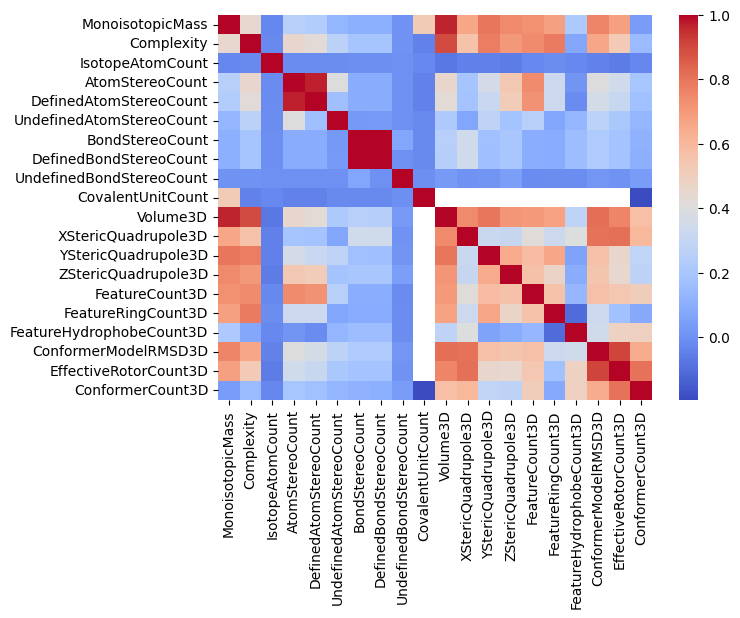

In [40]:
# heatmap for pubchem descriptors
plt.figure(figsize = (7,5))
sns.heatmap(pubchem_data.corr(), cmap="coolwarm")

Then we look at the correlation between RDKit descriptors. Here we see only correlation between similar descriptors (ex. MaxEStateIndex and MaxAbsEStateIndex). The solution is the same: to exclude one of the similar descriptors.

<AxesSubplot:>

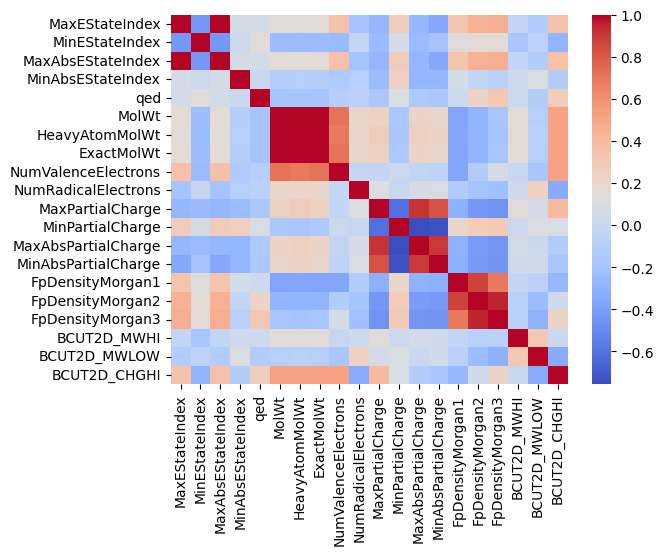

In [52]:
# heatmap for RDKit descriptors
sns.heatmap(rdkit_data.iloc[:, :20].corr(), cmap="coolwarm")

Finally, we investigate correlations between PaDEL descriptors. Here number of aromatic atoms and bonds strongly correlate with each other. Since we have organic molecules in our dataset, number of C-atoms and number of of H-atoms positively correlate with each other. We can exclude nHeavyAtom, nC and nH from dataset, and leave only nAtom, because it can show overall difference between organic and inorganic).

<AxesSubplot:>

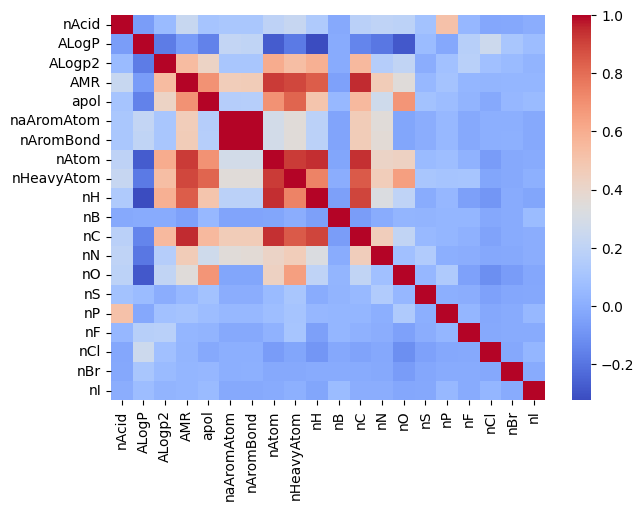

In [57]:
# heatmap for paDEL descriptors
plt.figure(figsize = (7,5))
sns.heatmap(padel_data.iloc[:, :20].corr(), cmap="coolwarm")

### Statistical tests

Statistical test for categorical feature:
- H0 - there is no relationship between measurement methos and refractive index
- H1 - there is some relationship between measurement methos and refractive index

Since there are more than one groups of measurement methods in our dataset, one-way ANOVA test should be used.

In [145]:
from scipy.stats import f_oneway
data0 = df_numeric[(df_numeric.measurement_method == 0)]['raw_value']
data1 = df_numeric[(df_numeric.measurement_method == 1)]['raw_value']
data2 = df_numeric[(df_numeric.measurement_method == 2)]['raw_value']
data3 = df_numeric[(df_numeric.measurement_method == 3)]['raw_value']
data4 = df_numeric[(df_numeric.measurement_method == 4)]['raw_value']
data5 = df_numeric[(df_numeric.measurement_method == 5)]['raw_value']
data6 = df_numeric[(df_numeric.measurement_method == 6)]['raw_value']
data7 = df_numeric[(df_numeric.measurement_method == 7)]['raw_value']
data8 = df_numeric[(df_numeric.measurement_method == 8)]['raw_value']
stat, p = f_oneway(data0, data1, data2, data3, data4, data5, data6, data7, data8)
print(f'stat={np.round(stat, 1)}, p={np.round(p, 1)}')
if p > 0.05:
    print('Probably there is NO relationship between refractive index and measurement method')
else:
    print('Probably there IS some relationship between refractive index and measurement method')

stat=14.3, p=0.0
Probably there IS some relationship between refractive index and measurement method


Statistical test for numeric features:
- H0 - there is no correlation between refractive index and the number of rings in a molecule
- H1 - there is some correlation between refractive index and the number of rings in a molecule

Since both features are numeric, we can use simple Pearson correlation test.

In [144]:
from scipy.stats.stats import pearsonr
f1 = df['raw_value']
f2 = df_imputed['nRing']
cor, p = pearsonr(f1, f2)
print(cor, p)
if p < 0.05:
    print('Probably there IS correlation')
else:
    print('Probably there is NO correlation')

C:\Users\User\AppData\Local\Temp\ipykernel_13464\4143138125.py:1: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



-0.0649395437680513 3.857658022396515e-05
Probably there IS correlation


### Linear dimnesionality reduction

Among available linear techniques PCA and ICA can be used for dimensinality reduction of our dataset. LDA is not appropriate here since it is a supervised method and our data is not labeled yet.

In [103]:
from sklearn.decomposition import FastICA
import matplotlib.cm as cm

Selection of the number of components

In [104]:
# perform ICA
ica = FastICA(n_components=20)
X_reduced = ica.fit_transform(X_normalized)

# calculate explained variance for components
ica_explained_variance = np.var(X_reduced, axis=0)

# calculate cumulative variance
explained_variance_ratio = ica_explained_variance / np.sum(ica_explained_variance)
y = np.cumsum(explained_variance_ratio)

# calculate principal components
xi = np.arange(1, y.shape[0]+1, step=1)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



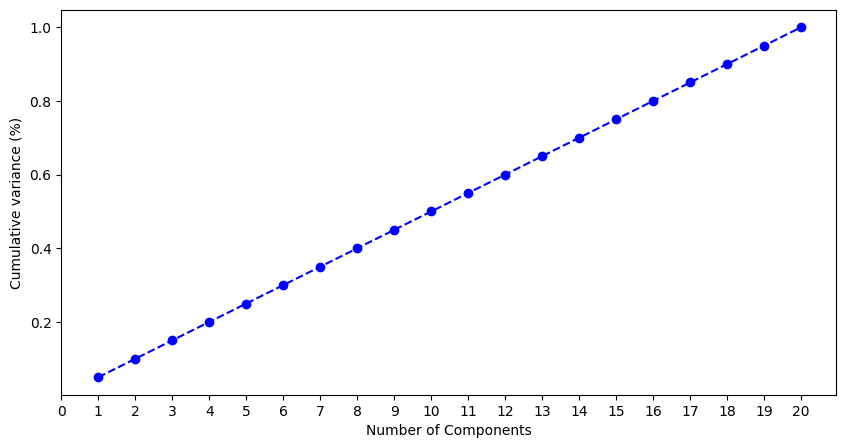

In [105]:
# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1))
plt.ylabel('Cumulative variance (%)')
plt.show()

This plot illustrates the main difference between PCA and ICA. In ICA components are chosen by their statistical independence, not by their variance. That's why number of components for ICA is usually determined according to some prior knowledge about the features and the task itself. We are going to work with 20 components.

Explanation of components

In [106]:
# combine part of the original dataset with ICs
df_ica = pd.DataFrame(data = X_reduced, columns = [f'IC{i}' for i in range(1,21)])
df_col = pd.concat([df_ica[['IC1', 'IC2', 'IC3']], pd.DataFrame(X_normalized.iloc[:, :10], columns=X_normalized.iloc[:, :10].columns)], axis=1)

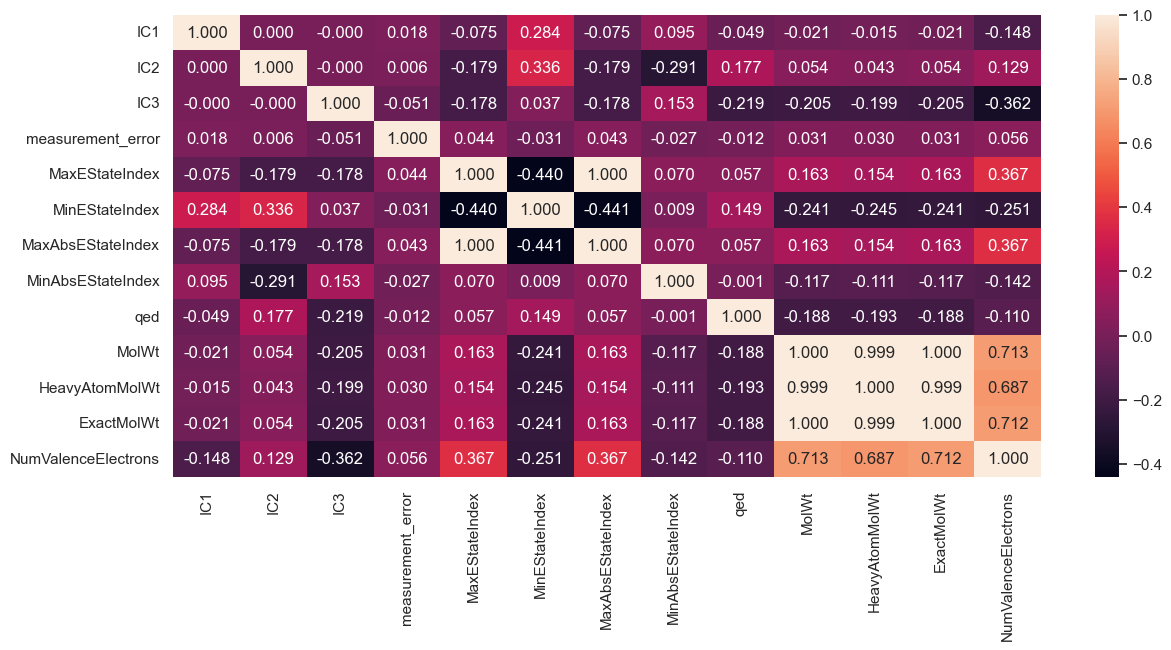

<Figure size 2800x1800 with 0 Axes>

In [107]:
# compute the correlations between the original data and ICs
corMatrix = pd.DataFrame.corr(df_col)

# plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

We see that ICs do not correlate with each other.

Components can be explained by investigating correlations with initial features:
- IC1 increases with the increase in "MinEStateIndex" and "MinAbsStateIndex" feature. It means that IC1 can be thought as a measure of electrotopological state of molecular structures
- IC2 has positive correlation with "qed" and "NumValenceElectrones"
- IC3 on the contrast has negative correlation with "qed" and "NumValenceElectrones".

### Non-linear dimensionality reduction

In [27]:
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter

T-SNE algorithm was chosen to perform non-linear dimensionality reduction as it is effective in revealing clusters and patterns in data (we will need it later for clustering task) and it is robust to noise. It also doesn't require tuning many hyperparameters, basically only one of them - perplexity. Number of components is chosen to be equal 2 because visualization will be needed later for clustering.

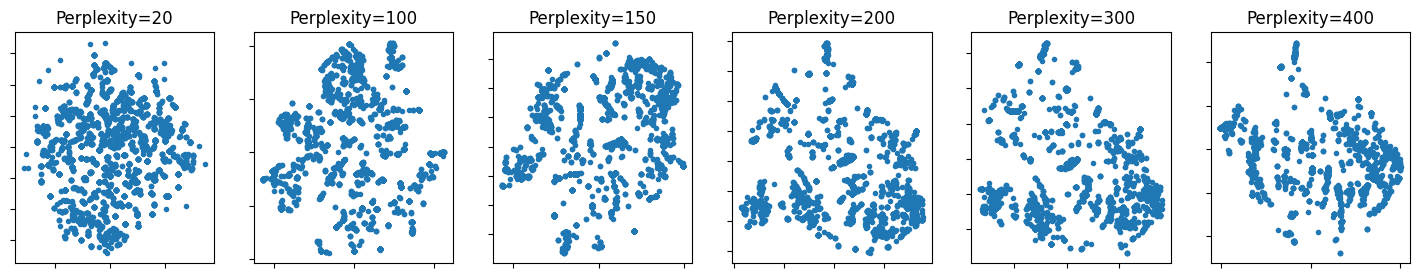

In [31]:
# choose optimal perplexity for TSNE
(fig, subplots) = plt.subplots(1, 6, figsize=(18, 3))
perplexities = [20, 100, 150, 200, 300, 400]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]
    tsne = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    X_tsne = tsne.fit_transform(X_normalized)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], s=9)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
plt.show()

After increasing the perplexity over 150, almost nothing changes. So we will work with perplexity=150. It also looks well for further clustering, as we can see some separate clouds of points.

In [28]:
# final result
tsne = TSNE(n_components=2, init="random", random_state=0, perplexity=150, n_iter=300)
X_tsne = tsne.fit_transform(X_normalized)

# Hometask №3. Clustering & feature engineering

To analyze our data structure we build a dendrogram. It can be seen that the majority of the data is separated into 3 main clusters.

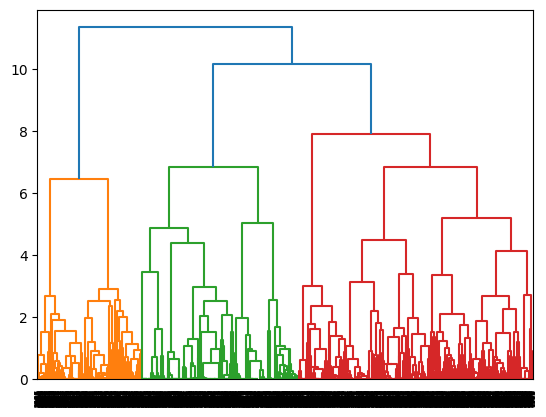

In [29]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X_tsne, 'average')
hierarchy.dendrogram(Z)
plt.show()

For clustering we use Gaussian Mixture Model, because our datapoints have different shapes and they probably overlap each other.

In [148]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [149]:
def draw_ellipse(position, covariances_, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariances_.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariances_)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariances_)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    sns.set_style("white")
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

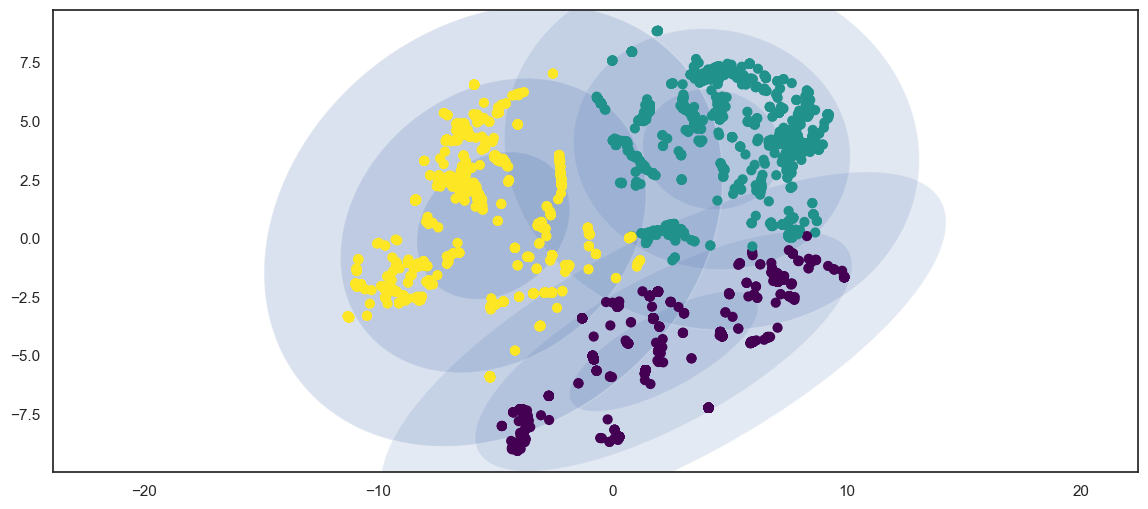

In [153]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X_tsne)
labels = gmm.predict(X_tsne)
plot_gmm(gmm, X_tsne)

In [160]:
df['cluster']=labels
df[df['cluster']==2]['normalised_name'].tolist()[:10]

['CC(C)OC(=O)C',
 'CCCCCO',
 'CCCO',
 'COC(=O)[C](C)C',
 'CC(=CCCC(C)(C=C)O)C',
 'C=Cc1ccccc1',
 'CCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]',
 'CCCC(=C)C',
 'CCCCCO',
 'CCCCCCC']

In [161]:
df[df['cluster']==1]['normalised_name'].tolist()[:10]

['[Cu+2].[Ga].[Se-2].[Se-2]',
 'O=[Si]=O',
 'O=[Nb](=O)O[Nb](=O)=O',
 'O=[Si]=O',
 'S1[As]2S[As]1S2',
 'O=[Ti]=O',
 '[Ar]',
 '[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[Ge+4].[Ge+4].[Ge+4].[Bi+3].[Bi+3].[Bi+3].[Bi+3]',
 'C1(=C(C(=C(C(=C1Cl)Cl)Cl)Cl)Cl)[O-].[Na+]',
 'O=[Ti]=O']

In [201]:
df[df['cluster']==0]['normalised_name'].tolist()[-10:]

['s1cnc2ccccc12',
 'C1=CC=C(C=C1)N',
 'B#N',
 'CO',
 'CCO',
 'O=[Mg]',
 'C1CCCCC1',
 'C(Cl)Cl',
 'CC(=O)C',
 'C1C=CC=CN1']

<AxesSubplot:xlabel='cluster', ylabel='C1SP2'>

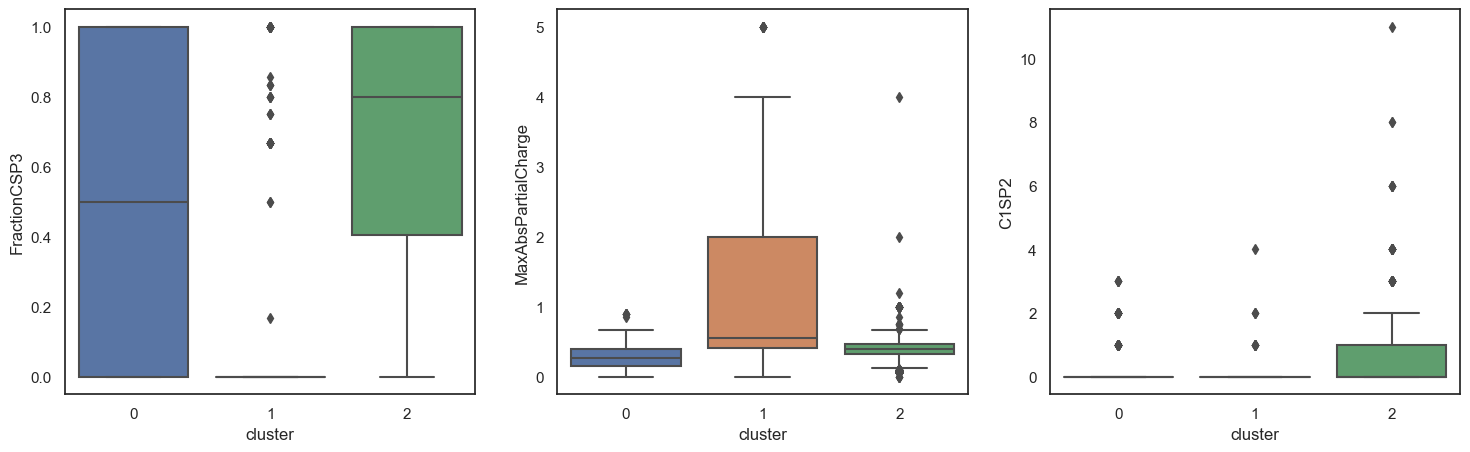

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], data=df, x='cluster', y='FractionCSP3')
sns.boxplot(ax=axes[1], data=df, x='cluster', y='MaxAbsPartialCharge')
sns.boxplot(ax=axes[2], data=df, x='cluster', y='C1SP2')

When analysing clusters we observed that they were formed according to:
- the nature of molecules (organic/inorganic) --> left boxplot
- molecular charge --> middle boxplot
- bond types --> right boxplot

So 1st and 3rd clusters are mostly organic with 0 charge, 2nd cluster is mostly inorganic chraged molecules.

### Feature engineering

In [ ]:
from autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = df_normalized.drop('raw_value', axis=1)
y = df_normalized['raw_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
          feateng_cols=None, feateng_steps=2, featsel_runs=3,
          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3', '1/'),)
model

In [ ]:
X_train_feature_creation = model.fit_transform(X_train.to_numpy(), y_train.to_numpy().flatten())

In [ ]:
X_test_feature_creation = model.transform(X_test.to_numpy())

In [ ]:
X_test_feature_creation.head()

In [ ]:
X_train_feature_creation.head()

In [ ]:
X_train_feature_creation.shape[1] - X_train.shape[1]

### Feature selection

Since we have mixed data types it is preferable to use Wrapper methods for feature selection. It's always better to combine several methods and compare the results, so we will use Genetic Algorithm and Recursive Feature Elimination.

In [5]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [23]:
# initialize learning estimator
estimator = RandomForestRegressor()

# initialize genetic algorithm parameters
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=10,
    n_population=10, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.2,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20,
    caching=True, n_jobs=-1)

# train genetic algorithm
model = model.fit(X_normalized, Y_normalized)

# print out selected features
print('Features:', (X_normalized.columns[model.support_]))

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features: Index(['PEOE_VSA1', 'EState_VSA2', 'fr_imidazole', 'Complexity', 'AATS7i',
       'ATSC0m', 'GATS8v'],
      dtype='object')


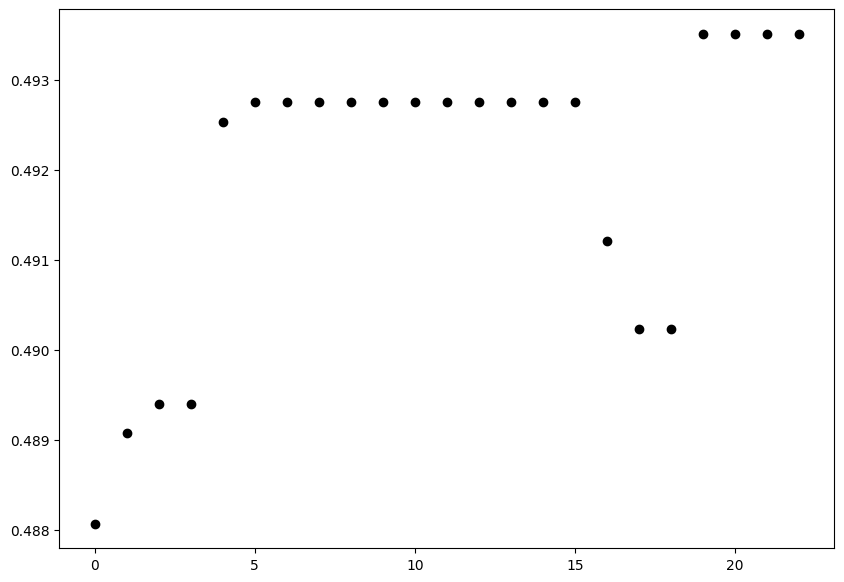

In [24]:
# plot generation scores
plt.plot(model.generation_scores_, 'o', color='black')

In [ ]:
# initialize estimator
estimator_rfe = RandomForestRegressor()

# initialize recursive feature eliminator
selector = RFE(estimator_rfe, n_features_to_select=10, step=1)

# train model
selector = selector.fit(X_normalized, Y_normalized)

# print out selected features
print('Selected features:', selector.get_feature_names_out())

# get score
print('R-squared:', np.round(selector.score(X_normalized, Y_normalized), decimals=4))

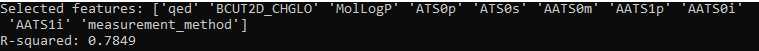

In [4]:
# calculations were made by supercomputer
from IPython.display import Image
Image(filename="C://Users//User//Downloads//eliminator.png")

We can see some similarities between GA- and RFE- selected descriptors. Both of the algorithms chose autocorrelation descriptors to be significant. However GA also highlighted descriptors connected with elecronegativity and electrotopological state, while RFE aslo chose drug-likeness descriptors, such as MolLogP and qed.